In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('AAPL.csv')

# Check the first few rows of the dataset
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [4]:
# Check for missing values
df.isnull().sum()

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' as the index (important for time series analysis)
df.set_index('Date', inplace=True)

# Check the data again after cleaning
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


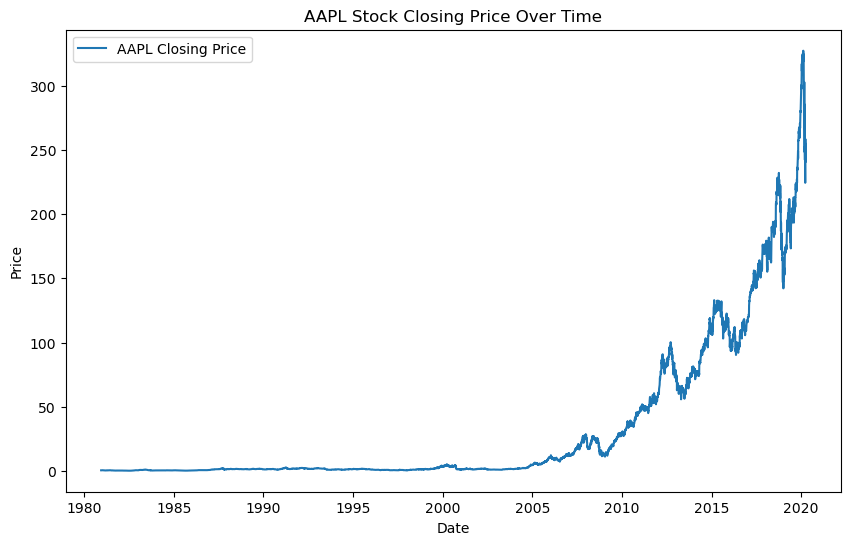

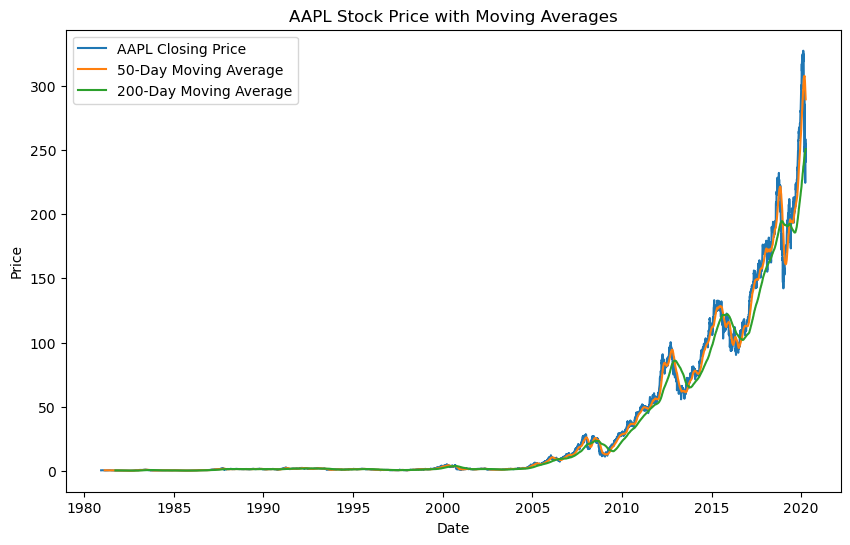

In [6]:
import matplotlib.pyplot as plt

# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='AAPL Closing Price')
plt.title('AAPL Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate moving averages
df['50-day MA'] = df['Close'].rolling(window=50).mean()
df['200-day MA'] = df['Close'].rolling(window=200).mean()

# Plot the closing price along with moving averages
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='AAPL Closing Price')
plt.plot(df['50-day MA'], label='50-Day Moving Average')
plt.plot(df['200-day MA'], label='200-Day Moving Average')
plt.title('AAPL Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. 

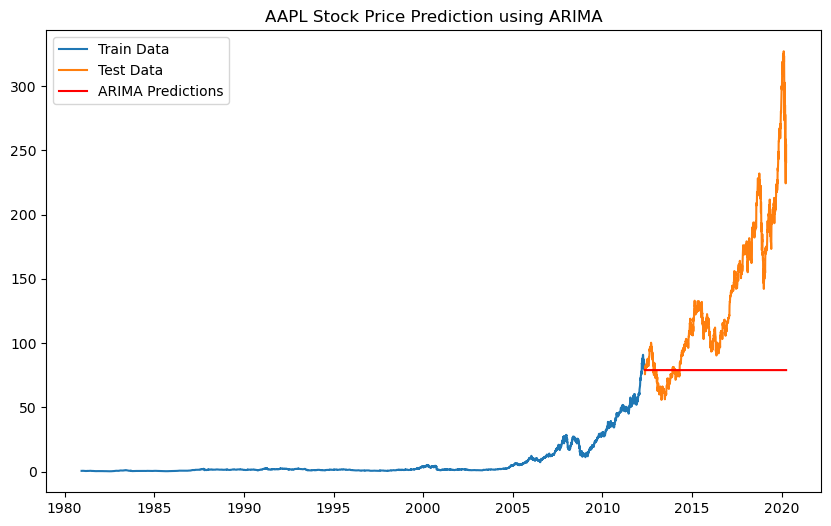

In [20]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and test sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # (p,d,q) - adjust parameters if needed
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, predictions, label='ARIMA Predictions', color='red')
plt.legend()
plt.title('AAPL Stock Price Prediction using ARIMA')
plt.show()
